/Users/satoshan/Library/CloudStorage/Box-Box/scan_org_charts/2010/image00101.jpg


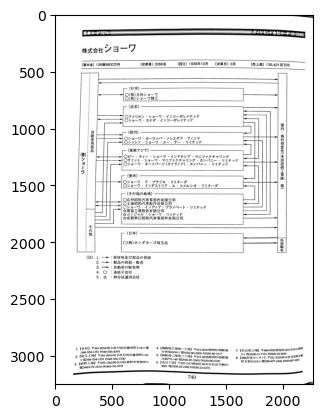

In [41]:
import cv2 as cv2
import os
import matplotlib.pyplot as plt
import easyocr
import pyocr
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import sys
path = "/Users/satoshan/Library/CloudStorage/Box-Box/scan_org_charts/"
path_2010 = path + "2010"

# Choose 2010 of "三井造船"
files = os.listdir(path_2010)
files = [f for f in files if os.path.isfile(os.path.join(path_2010, f))]
files.sort()
file = os.path.join(path_2010, files[100])

# img 
print(file)
img = cv2.imread(file)
plt.imshow(img)
plt.show()

丁券コド7274ーーーーーーーーーー ダイヤモンド 会社ヨード-101 35982


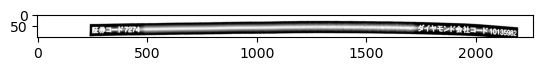

In [42]:
# code detection ocr
header = img[100:200, :]
pil_image = Image.fromarray(header)
tools = pyocr.get_available_tools()
tool = tools[0]
txt = tool.image_to_string(
    pil_image,
    lang="jpn",
    builder=pyocr.builders.TextBuilder(tesseract_layout=11)
)
substring = txt[5:9]
print(txt)

plt.imshow(header)
plt.show()

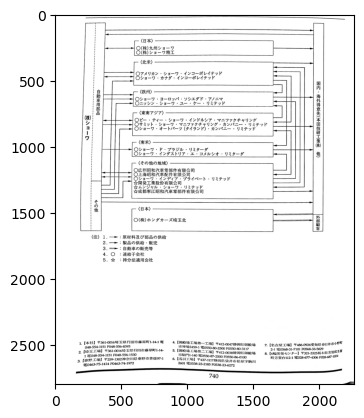

In [43]:
# cutting header
header_size = 450
cropped_image = img[header_size:, :]
plt.imshow(cropped_image)
plt.show()

1878


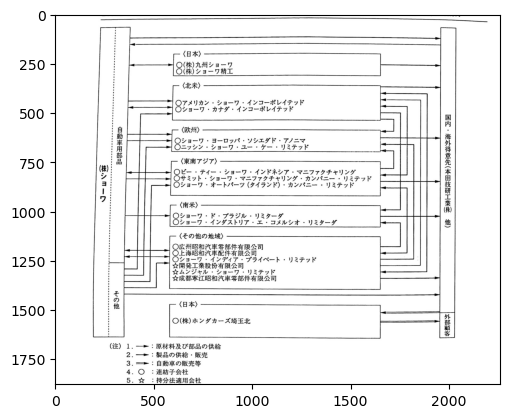

In [44]:
# cutting footer
# make figure biniary
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
gray_image_inv = cv2.bitwise_not(gray_image)

# footer detection
row_sums = np.sum(gray_image_inv, axis=1) 
threshold = 100
empty_row_threshold = 30

empty_row_count = 0
footer_start = None
for i, row_sum in enumerate(row_sums):
    if row_sum < threshold:
        empty_row_count += 1
    else:
        empty_row_count = 0
    if empty_row_count >= empty_row_threshold:
        footer_start = i - empty_row_threshold + 1
        break

if footer_start is not None:
    final_image = cropped_image[:footer_start, :]
else:
    final_image = cropped_image

print(footer_start)
plt.imshow(final_image)
plt.show()